In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
from scipy.integrate import simpson


FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF = [400, 450, 500, 550]


df_my = pd.read_csv("Deuteron/deuteron_all_data.csv")
df_my.T21D2 *= 2
df_my.T22D2 *= 2
df_my.T21D *= 2
df_my.T22D *= 2
df_my.AX *= -1
df_my.AX2 *= -1
df_exp = pd.read_csv("./Deuteron/deuteron_exp_diffcross.csv")
df_exp_tot = pd.read_csv("./Deuteron/deuteron_exp_totcross.csv")

OBSERVABLES = [ob for ob in df_my.columns.values if ob not in [
    "THCM", "angle", "CUTOFF", "FORCE"]]

my_energies = df_my.Energy.unique()
my_energies.sort()

In [3]:
en = 100
cutoff = 450
# P0 = 0.81486650255301551
P0 = 1.5144321281060260
ICUT=2
LAMBDA = [0.6, 0.6, 0.6, 0.5, 0.4]
EPSILON = P0*197.33/1000./LAMBDA[ICUT]

In [4]:
# P0MEV[-1]/450

In [5]:
FMM1=197.327
MN=939.5653
MP=938.2720
MM=2.0*MP*MN/(MP+MN)
EBDEUTALL = np.array([-2.1189454304609652, -2.1830488263808228,
             -2.1998863525318981, -2.2232629900695660,
             -2.2232629164870863, -2.2232628519800381])
ELABNN = en-np.abs(EBDEUTALL)
ECMNN=ELABNN-en**2/(4.0*MM)
P0MEV=np.sqrt(ECMNN*MM)

In [5]:
EPSILON

0.49807148639860355

In [566]:
EPSILON = max([P0*197.33/1000/0.6, 0.138/0.6])


In [593]:
# EPSILON = max([P0MEV[-1]/cutoff, 0.138/1000/cutoff])
EPSILON = max([P0MEV[-1]/600, 0.138/1000/600])


In [10]:
df_tmp = df_my[(df_my.CUTOFF == 450) &
                (df_my.Energy == en) &
                # (df_my.FORCE.isin(FORCES[:-1])) &
                (df_my.WAVE == "SIEGERT")]
df_tmp.sort_values("angle", inplace=True)

/home/vitalii/anaconda3/envs/experimental/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [37]:
df_piv


FORCE,LO,N2LO,N3LO,N4LO,N4LO+,NLO
angle,,,,,,
0.0,3.027,4.929,5.062,4.950,4.941,4.372
1.0,3.028,4.930,5.063,4.951,4.942,4.373
2.0,3.033,4.933,5.065,4.954,4.944,4.376
3.0,3.042,4.937,5.070,4.958,4.949,4.381
4.0,3.053,4.944,5.076,4.965,4.956,4.389
...,...,...,...,...,...,...
176.0,2.225,3.399,3.443,3.406,3.419,3.148
177.0,2.223,3.400,3.443,3.406,3.419,3.149
178.0,2.222,3.400,3.443,3.407,3.419,3.150


In [11]:
df_piv = df_tmp.pivot(index="angle", columns="FORCE")["CROSS2"].reindex(FORCES, axis=1)

In [16]:
df = pd.read_csv(
    "/home/vitalii/Jagiellonian_work/Deuteron/DEUTERON_PHOTODISINTEGRATION/ThruncationErrorsMy/Thruncs_VU100MeV_2022.dat",
    header=None, delim_whitespace=True)


In [594]:
df_diff = pd.DataFrame(columns=FORCES)

In [595]:
orders = np.arange(6)
orders[1:] += 1

In [596]:
for i, (order, force) in enumerate(zip(orders, FORCES)):
    maxdiff = df_piv[FORCES[i:]].max(axis=1) - df_piv[FORCES[i:]].min(axis=1)
    base = df_piv["LO"]*EPSILON**(order+1+int(order==0))
    diff = []
    maxdiff2 = []
    for j in range(2, order+1):
        diff.append((df_piv[FORCES[np.where(orders == j)[0][0]]] -
                     df_piv[FORCES[np.where(orders == j)[0][0]-1]])*EPSILON**(order+1-j))
    for j in range(i):
        maxdiff2.append(df_diff[FORCES[j]]*EPSILON**(i-j))
    print(order, force)
    df_diff[force] = np.max((base, maxdiff, *diff, *maxdiff2), axis=0)

0 LO
2 NLO
3 N2LO
4 N3LO
5 N4LO
6 N4LO+


In [33]:
from truncation import get_truncation

In [34]:
df_trunc = get_truncation(df_piv, 100, Lambda=650)

0.45975130529305525


In [537]:
plt.close("all")

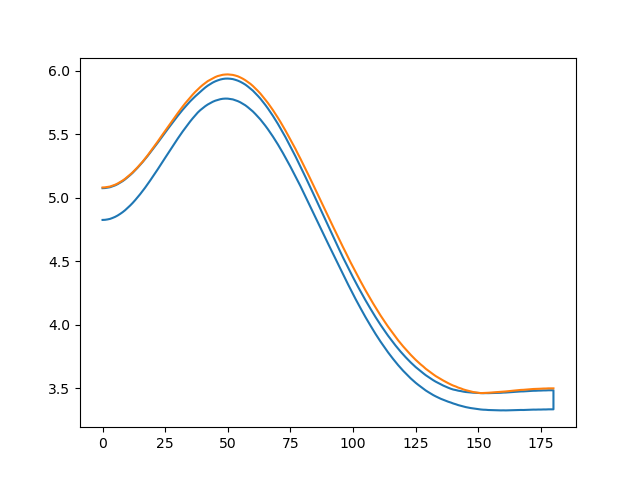

In [35]:
plt.figure()
plt.plot(df[0], df[4])
# plt.plot(df_diff.angle,
#          df_tmp[df_tmp.FORCE == "LO"][["CROSS2"]].values.flatten())
# plt.plot(df_diff.index.values,
        #  df_tmp[df_tmp.FORCE == "N2LO"][["CROSS2"]].values.flatten()+df_diff["N2LO"].values)
# plt.plot(df_trunc.index.values,
        #  df_tmp[df_tmp.FORCE == "NLO"][["CROSS2"]].values.flatten())
plt.plot(df_trunc.index.values,
         df_tmp[df_tmp.FORCE == "N4LO"][["CROSS2"]].values.flatten()+df_trunc["N3LO"].values)
# plt.plot(df_trunc.index.values,
#          df_tmp[df_tmp.FORCE == "N4LO"][["CROSS2"]].values.flatten()-df_trunc["N4LO"].values)
# plt.plot(df_diff.index.values,
#          df_tmp[df_tmp.FORCE == "NLO"][["CROSS2"]].values.flatten()-df_diff["NLO"].values)
# plt.plot(df_diff.angle,
#          df_tmp[df_tmp.FORCE == "NLO"][["CROSS2"]].values.flatten()-trunc_lo)
# plt.plot(df_tmp[df_tmp.FORCE == "LO"].angle,
#          df_tmp[df_tmp.FORCE == "LO"][["CROSS2"]]-df_tmp[df_tmp.FORCE == "LO"][["CROSS2"]]*EPSILON**2)
plt.show()

In [ ]:
CROSS_TOT = []
for energy in tqdm(my_energies):
    df_tmp = df_my[(df_my.FORCE == "N4LO+") &
                   (df_my.CUTOFF == 450) &
                   (df_my.Energy == energy) &
                   (df_my.WAVE == "SIEGERT")]
    x = df_tmp.THCM.values
    y = df_tmp.CROSS2.values*np.sin(x)
    CROSS_TOT.append(2*np.pi*simpson(y, x=x))
CROSS_TOT = np.array(CROSS_TOT)
CROSS_TOT = np.nan_to_num(CROSS_TOT)


In [94]:
df_tmp = df_my[(df_my.CUTOFF == 450) &
                (df_my.Energy == 140) &
                (df_my.WAVE == "SIEGERT")]

df_piv = df_tmp.pivot(index="angle", columns="FORCE")[
    "CROSS2"].reindex(FORCES, axis=1)

df = pd.DataFrame(columns=FORCES)
df.loc[0] = simpson(df_piv, 2*np.pi*df_piv.index.values, axis=0)
df_trunc = get_truncation(df, 140)


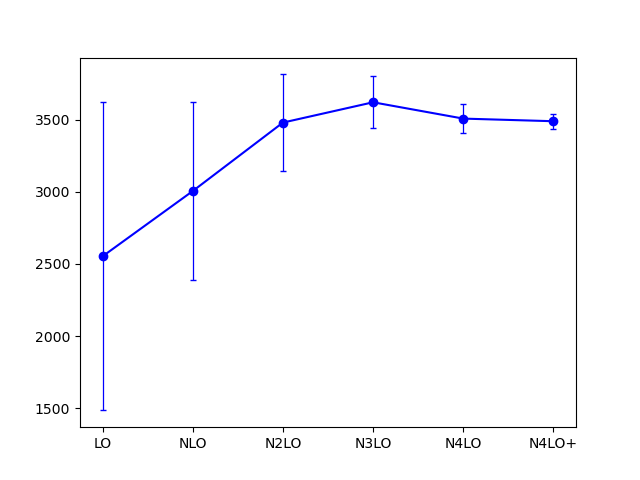

In [102]:
plt.figure()
plt.errorbar(np.arange(6), df.loc[0], yerr=df_trunc.loc[0],
             fmt="o-", color="blue", markersize=6, elinewidth=0.9, capsize=2.5)
# plt.yscale("log")
plt.xticks(ticks=np.arange(6), labels=FORCES)
plt.show()
